In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv("../dataset/raw/wfp_food_prices_ind.csv")

C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\1365723047.py:1: DtypeWarning: Columns (4,5,6,9,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../dataset/raw/wfp_food_prices_ind.csv")


In [3]:
df.head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
2,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Wheat,84,KG,actual,Retail,INR,5,0.16
3,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,miscellaneous food,Sugar,97,KG,actual,Retail,INR,13.5,0.43
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Rice,52,KG,actual,Retail,INR,6.8,0.22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141052 entries, 0 to 141051
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          141052 non-null  object
 1   admin1        140576 non-null  object
 2   admin2        140576 non-null  object
 3   market        141052 non-null  object
 4   market_id     141052 non-null  object
 5   latitude      140576 non-null  object
 6   longitude     140576 non-null  object
 7   category      141052 non-null  object
 8   commodity     141052 non-null  object
 9   commodity_id  141052 non-null  object
 10  unit          141052 non-null  object
 11  priceflag     141052 non-null  object
 12  pricetype     141052 non-null  object
 13  currency      141052 non-null  object
 14  price         141052 non-null  object
 15  usdprice      141052 non-null  object
dtypes: object(16)
memory usage: 17.2+ MB


In [5]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'market_id', 'latitude',
       'longitude', 'category', 'commodity', 'commodity_id', 'unit',
       'priceflag', 'pricetype', 'currency', 'price', 'usdprice'],
      dtype='object')

In [6]:
df.nunique()

date              383
admin1             32
admin2            164
market            171
market_id         227
latitude          218
longitude         211
category            7
commodity          24
commodity_id       47
unit                4
priceflag           2
pricetype           3
currency            2
price           22425
usdprice         2867
dtype: int64

In [7]:
df['priceflag'].unique()

array(['#item+price+flag', 'actual'], dtype=object)

In [8]:
df['pricetype'].unique()

array(['#item+price+type', 'Retail', 'Wholesale'], dtype=object)

In [9]:
df["commodity"].unique()

array(['#item+name', 'Rice', 'Wheat', 'Sugar', 'Oil (mustard)',
       'Potatoes', 'Chickpeas', 'Onions', 'Milk', 'Wheat flour',
       'Oil (palm)', 'Oil (sunflower)', 'Lentils (masur)', 'Tomatoes',
       'Milk (pasteurized)', 'Salt (iodised)', 'Oil (groundnut)',
       'Lentils', 'Tea (black)', 'Lentils (moong)', 'Lentils (urad)',
       'Sugar (jaggery/gur)', 'Ghee (vanaspati)', 'Oil (soybean)'],
      dtype=object)

In [10]:
df["unit"].unique()

array(['#item+unit', 'KG', '100 KG', 'L'], dtype=object)

In [11]:
df["admin1"].unique()

array(['#adm1+name', 'Delhi', 'Gujarat', 'Himachal Pradesh', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Telangana', 'Tripura',
       'West Bengal', 'Meghalaya', 'Rajasthan', 'Tamil Nadu', 'Assam',
       'Kerala', 'Uttar Pradesh', 'Mizoram', 'Bihar', 'Chandigarh',
       'Jharkhand', 'Nagaland', 'Punjab', 'Uttarakhand', 'Andhra Pradesh',
       'Haryana', 'Andaman and Nicobar', 'Puducherry', 'Goa', nan,
       'Chhattisgarh', 'Manipur', 'Sikkim'], dtype=object)

In [12]:
df["admin2"].unique()

array(['#adm2+name', 'Delhi', 'Ahmadabad', 'Shimla', 'Bangalore Urban',
       'Bhopal', 'Mumbai city', 'Khordha', 'Hyderabad', 'West Tripura',
       'Kolkata', 'East Khasi Hills', 'Bikaner', 'Chennai', 'Kamrup',
       'Thiruvananthapuram', 'Lucknow', 'Aizawl', 'Patna', 'Chandigarh',
       'Ranchi', 'Amravati', 'Kohima', 'Amritsar', 'Ludhiana',
       'Dehra Dun', 'Krishna', 'Rajkot', 'Dindigul', 'Kanpur', 'Banka',
       'Hisar', 'Karnal', 'Mandi', 'Dharwad', 'Bid', 'Cuttack',
       'Sambalpur', 'Tiruchchirappalli', 'Agra', 'Varanasi', 'Darjiling',
       'Indore', 'Dimapur', 'Bathinda', 'Jodhpur', 'Ernakulam', 'Kota',
       'Andaman Islands', 'Puducherry', 'North Goa', 'Gurgaon',
       'Panchkula', 'Kozhikode', 'Gwalior', 'Jabalpur', 'Sundargarh', nan,
       'Chittoor', 'Kurnool', 'Vishakhapatnam', 'Darbhanga', 'Gaya',
       'Muzaffarpur', 'Purnia', 'Bastar', 'Bilaspur', 'Durg', 'Surguja',
       'Kachchh', 'Surat', 'Kangra', 'Solan', 'Dakshin Kannad', 'Mysore',
       'Palak

In [13]:
df.head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
2,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Wheat,84,KG,actual,Retail,INR,5,0.16
3,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,miscellaneous food,Sugar,97,KG,actual,Retail,INR,13.5,0.43
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Rice,52,KG,actual,Retail,INR,6.8,0.22


In [14]:
df["category"].unique()

array(['#item+type', 'cereals and tubers', 'miscellaneous food',
       'oil and fats', 'pulses and nuts', 'vegetables and fruits',
       'milk and dairy'], dtype=object)

In [15]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'market_id', 'latitude',
       'longitude', 'category', 'commodity', 'commodity_id', 'unit',
       'priceflag', 'pricetype', 'currency', 'price', 'usdprice'],
      dtype='object')

In [16]:
# remove row 0
df1 = df.drop(index=0, inplace=False)

In [17]:
df1.head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
2,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Wheat,84,KG,actual,Retail,INR,5,0.16
3,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,miscellaneous food,Sugar,97,KG,actual,Retail,INR,13.5,0.43
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Rice,52,KG,actual,Retail,INR,6.8,0.22
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Wheat,84,KG,actual,Retail,INR,6.2,0.2


In [18]:
# convert other columns to their respective data types
df1 = df1.astype(
    {
        'admin1': 'string',
        'admin2': 'string',
        'market': 'string',
        'category': 'string',
        'commodity': 'string',
        'unit': 'string',
        'priceflag': 'string',
        'pricetype': 'string',
        'currency': 'string',
        'market_id': 'int',
        'commodity_id': 'int',
        'latitude': 'float',
        'longitude': 'float',
        'price': 'float',
        'usdprice': 'float'
    }
)

In [19]:
# convert date to datetime
df1['date']  = pd.to_datetime(df1['date'])

<Axes: xlabel='date'>

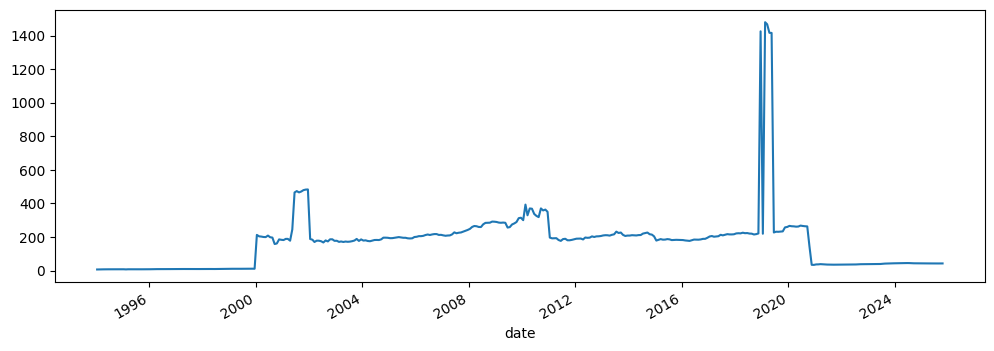

In [20]:
# plot the trend of commodities

df1[df1['commodity'] == 'Rice'].groupby('date')['price'].mean().plot(figsize=(12,4))


PREPROCESSING 

- ~~commodity - remove the brackets and standardise - call that sub category~~
- ~~standardize the item units~~
- ~~rename admin1 as state~~
- ~~rename admin2 as city~~
- ~~Do a nan check - remove the rows with nans~~
- ~~remove first row - coming from some kind of json object~~
- ~~Divide the date column to year and month => for annual and monthly kind of understanding;~~
    ~~This will also help us in identifying if the hike in prices is due to monsoon or winter or something like that~~
- ~~Understand the date frequency~~
- ~~Convert the data types into proper objects~~

In [21]:
# Chech for missing values

df1.isna().sum()

date              0
admin1          476
admin2          476
market            0
market_id         0
latitude        476
longitude       476
category          0
commodity         0
commodity_id      0
unit              0
priceflag         0
pricetype         0
currency          0
price             0
usdprice          0
dtype: int64

In [22]:
# Filter df where admin1 is nan

df_filtered = df1[df1['admin1'].isna()]
df_filtered

# We notice that df1 has about 476 rows that have city name nan
# for these 476 rows the market is national_average. 
# drop the nan values from df1 
# create another dataframe and save it as a new table

df_filtered.to_csv("../dataset/raw/wfp_food_prices_national_avg.csv")

In [23]:
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140575 entries, 1 to 141051
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          140575 non-null  datetime64[ns]
 1   admin1        140575 non-null  string        
 2   admin2        140575 non-null  string        
 3   market        140575 non-null  string        
 4   market_id     140575 non-null  int64         
 5   latitude      140575 non-null  float64       
 6   longitude     140575 non-null  float64       
 7   category      140575 non-null  string        
 8   commodity     140575 non-null  string        
 9   commodity_id  140575 non-null  int64         
 10  unit          140575 non-null  string        
 11  priceflag     140575 non-null  string        
 12  pricetype     140575 non-null  string        
 13  currency      140575 non-null  string        
 14  price         140575 non-null  float64       
 15  usdprice      140575 n

In [24]:
# understand data frequency 
date_range = df2['date'].sort_values().drop_duplicates()

freq = pd.infer_freq(date_range)
print("Frequency of the data is: ", freq)

Frequency of the data is:  None



Top diffs(days) with counts and percentages: 

      count  percent
date                
28.0     24     6.30
29.0      8     2.10
30.0    127    33.33
31.0    222    58.27

median diff: 31.0 mode diff(s): [np.float64(31.0)]

Likely frequency: monthly (mode 31 days)


<Axes: title={'center': 'Frequency of date differences in days'}, xlabel='date'>

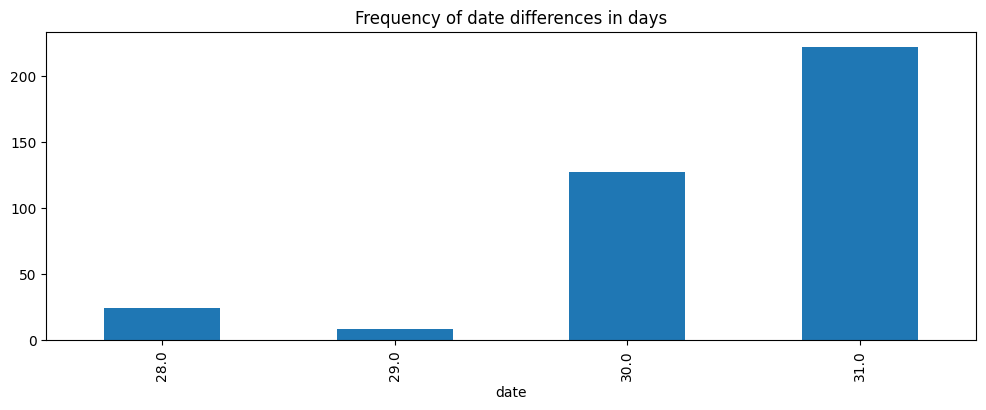

In [25]:
diffs = date_range.diff().dt.days.dropna()
vc = diffs.value_counts().sort_index()

print("\nTop diffs(days) with counts and percentages: \n")
pct = (vc / vc.sum() * 100).round(2)

print(pd.concat([vc, pct], axis=1, keys=['count','percent']))
print("\nmedian diff:", diffs.median(), "mode diff(s):", list(diffs.mode().values))

mode = int(diffs.mode().iloc[0])
if mode in (7, 14):
    print("\nLikely frequency: weekly (mode {} days)".format(mode))
elif 28 <= mode <= 31:
    print("\nLikely frequency: monthly (mode {} days)".format(mode))
elif mode == 1:
    print("\nLikely frequency: daily")
else:
    print("\nFrequency looks irregular or mixed; inspect the diffs above.")

vc.plot(kind='bar', figsize=(12,4), title='Frequency of date differences in days')

Assumption: Data is mostly monthly

In [26]:
# turn date to day, month and year columns

df2['day'] = df2['date'].dt.day
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\837640852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'] = df2['date'].dt.day
C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\837640852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['date'].dt.month
C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\837640852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [27]:
df2.head(5)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,day,month,year
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8.0,0.26,15,1,1994
2,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Wheat,84,KG,actual,Retail,INR,5.0,0.16,15,1,1994
3,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,miscellaneous food,Sugar,97,KG,actual,Retail,INR,13.5,0.43,15,1,1994
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Rice,52,KG,actual,Retail,INR,6.8,0.22,15,1,1994
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Wheat,84,KG,actual,Retail,INR,6.2,0.20,15,1,1994


In [28]:
df2.rename(columns= {
    'admin1' : 'state',
    'admin2' : 'city'
}, inplace=True)

C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\3669142325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns= {


In [29]:
# Standardize units
df2['unit'].unique()



<StringArray>
['KG', '100 KG', 'L']
Length: 3, dtype: string

In [30]:
# Some units have 100 KG written
# Convert them to KG
# likewise price = price/100
# usdprice = usdprice/100

df2.loc[df2['unit'] == '100 KG', 'price'] = df2.loc[df2['unit'] == '100 KG', 'price'] / 100
df2.loc[df2['unit'] == '100 KG', 'usdprice'] = df2.loc[df2['unit'] == '100 KG', 'usdprice'] / 100
df2.loc[df2['unit'] == '100 KG', 'unit'] = 'KG'

# Check if units are standardized
df2['unit'].unique()


<StringArray>
['KG', 'L']
Length: 2, dtype: string

In [31]:
# Create a new column called sub_category by removing brackets from commodity
df2['sub_category'] = df2['commodity'].str.replace(r"\s*\(.*\)","", regex=True)

C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\3663269461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sub_category'] = df2['commodity'].str.replace(r"\s*\(.*\)","", regex=True)


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140575 entries, 1 to 141051
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          140575 non-null  datetime64[ns]
 1   state         140575 non-null  string        
 2   city          140575 non-null  string        
 3   market        140575 non-null  string        
 4   market_id     140575 non-null  int64         
 5   latitude      140575 non-null  float64       
 6   longitude     140575 non-null  float64       
 7   category      140575 non-null  string        
 8   commodity     140575 non-null  string        
 9   commodity_id  140575 non-null  int64         
 10  unit          140575 non-null  string        
 11  priceflag     140575 non-null  string        
 12  pricetype     140575 non-null  string        
 13  currency      140575 non-null  string        
 14  price         140575 non-null  float64       
 15  usdprice      140575 n

In [33]:
# remove any duplicate rows
df2.drop_duplicates(inplace=True)

C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\3338361617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140575 entries, 1 to 141051
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          140575 non-null  datetime64[ns]
 1   state         140575 non-null  string        
 2   city          140575 non-null  string        
 3   market        140575 non-null  string        
 4   market_id     140575 non-null  int64         
 5   latitude      140575 non-null  float64       
 6   longitude     140575 non-null  float64       
 7   category      140575 non-null  string        
 8   commodity     140575 non-null  string        
 9   commodity_id  140575 non-null  int64         
 10  unit          140575 non-null  string        
 11  priceflag     140575 non-null  string        
 12  pricetype     140575 non-null  string        
 13  currency      140575 non-null  string        
 14  price         140575 non-null  float64       
 15  usdprice      140575 n

In [35]:
# outliers

nonpos = df2[(df2["price"] <= 0) | (df2["usdprice"] <= 0)]
print("Non-positive rows (price or usdprice <= 0):", len(nonpos))

Non-positive rows (price or usdprice <= 0): 0


INTERQUARTILE RANGE

- it is a way to detect outliers 
- Measures the variability in a dataset
- The data is divided into ascending order and then split into 4 halves or quartiles
- Q1 - 25th percentile
- Q2 - 50th percentile
- Q3 - 75th percentile

- If a dataset has 2n / 2n+1 points
- Q1 - median of n smallest data points
- Q3 - median of n highest data points
- Q2 - median of the entire dataset

- IQR = Q3 - Q1

INTERQUARTILE RANGE RULE

- Outliers are then defined as points that fall 
    -> below Q1 - 1.5*IQR
    -> above Q3 + 1.5*IQR

- Multiplier can be changed based on how inclusive or exclusive interquartile range is required for the task



In [69]:
def flag_extreme_outliers(df, col="price", iqr_mult=3, global_pct=0.999):
    out_idx = set()
    for name, g in df.groupby("sub_category"):
        vals = g[col].dropna()
        if vals.empty:
            continue
        q1, q3 = vals.quantile([0.25, 0.75])
        iqr = q3 - q1
        if pd.isna(iqr) or iqr == 0:
            continue
        high = q3 + iqr_mult * iqr
        low = q1 - iqr_mult * iqr
        out_idx.update(g[(g[col] > high) | (g[col] < low)].index.tolist())
    # include global extreme highs
    try:
        th = df[col].quantile(global_pct)
        out_idx.update(df[df[col] > th].index.tolist())
    except Exception:
        pass
    return df.loc[sorted(out_idx)]

outliers_price = flag_extreme_outliers(df2, "price")
print("Candidate extreme outliers (price):", len(outliers_price))

# display(outliers_price[["date","state","city","sub_category","price","usdprice"]].head(50))

df2['Outlier_Flag'] = df2.index.isin(outliers_price.index).astype(int)

Candidate extreme outliers (price): 447


C:\Users\siddi\AppData\Local\Temp\ipykernel_24136\1235475319.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Outlier_Flag'] = df2.index.isin(outliers_price.index).astype(int)


In [ ]:
df[df['commodity'] == 'Rice'].groupby('date')['price'].mean().plot(figsize=(12,4))

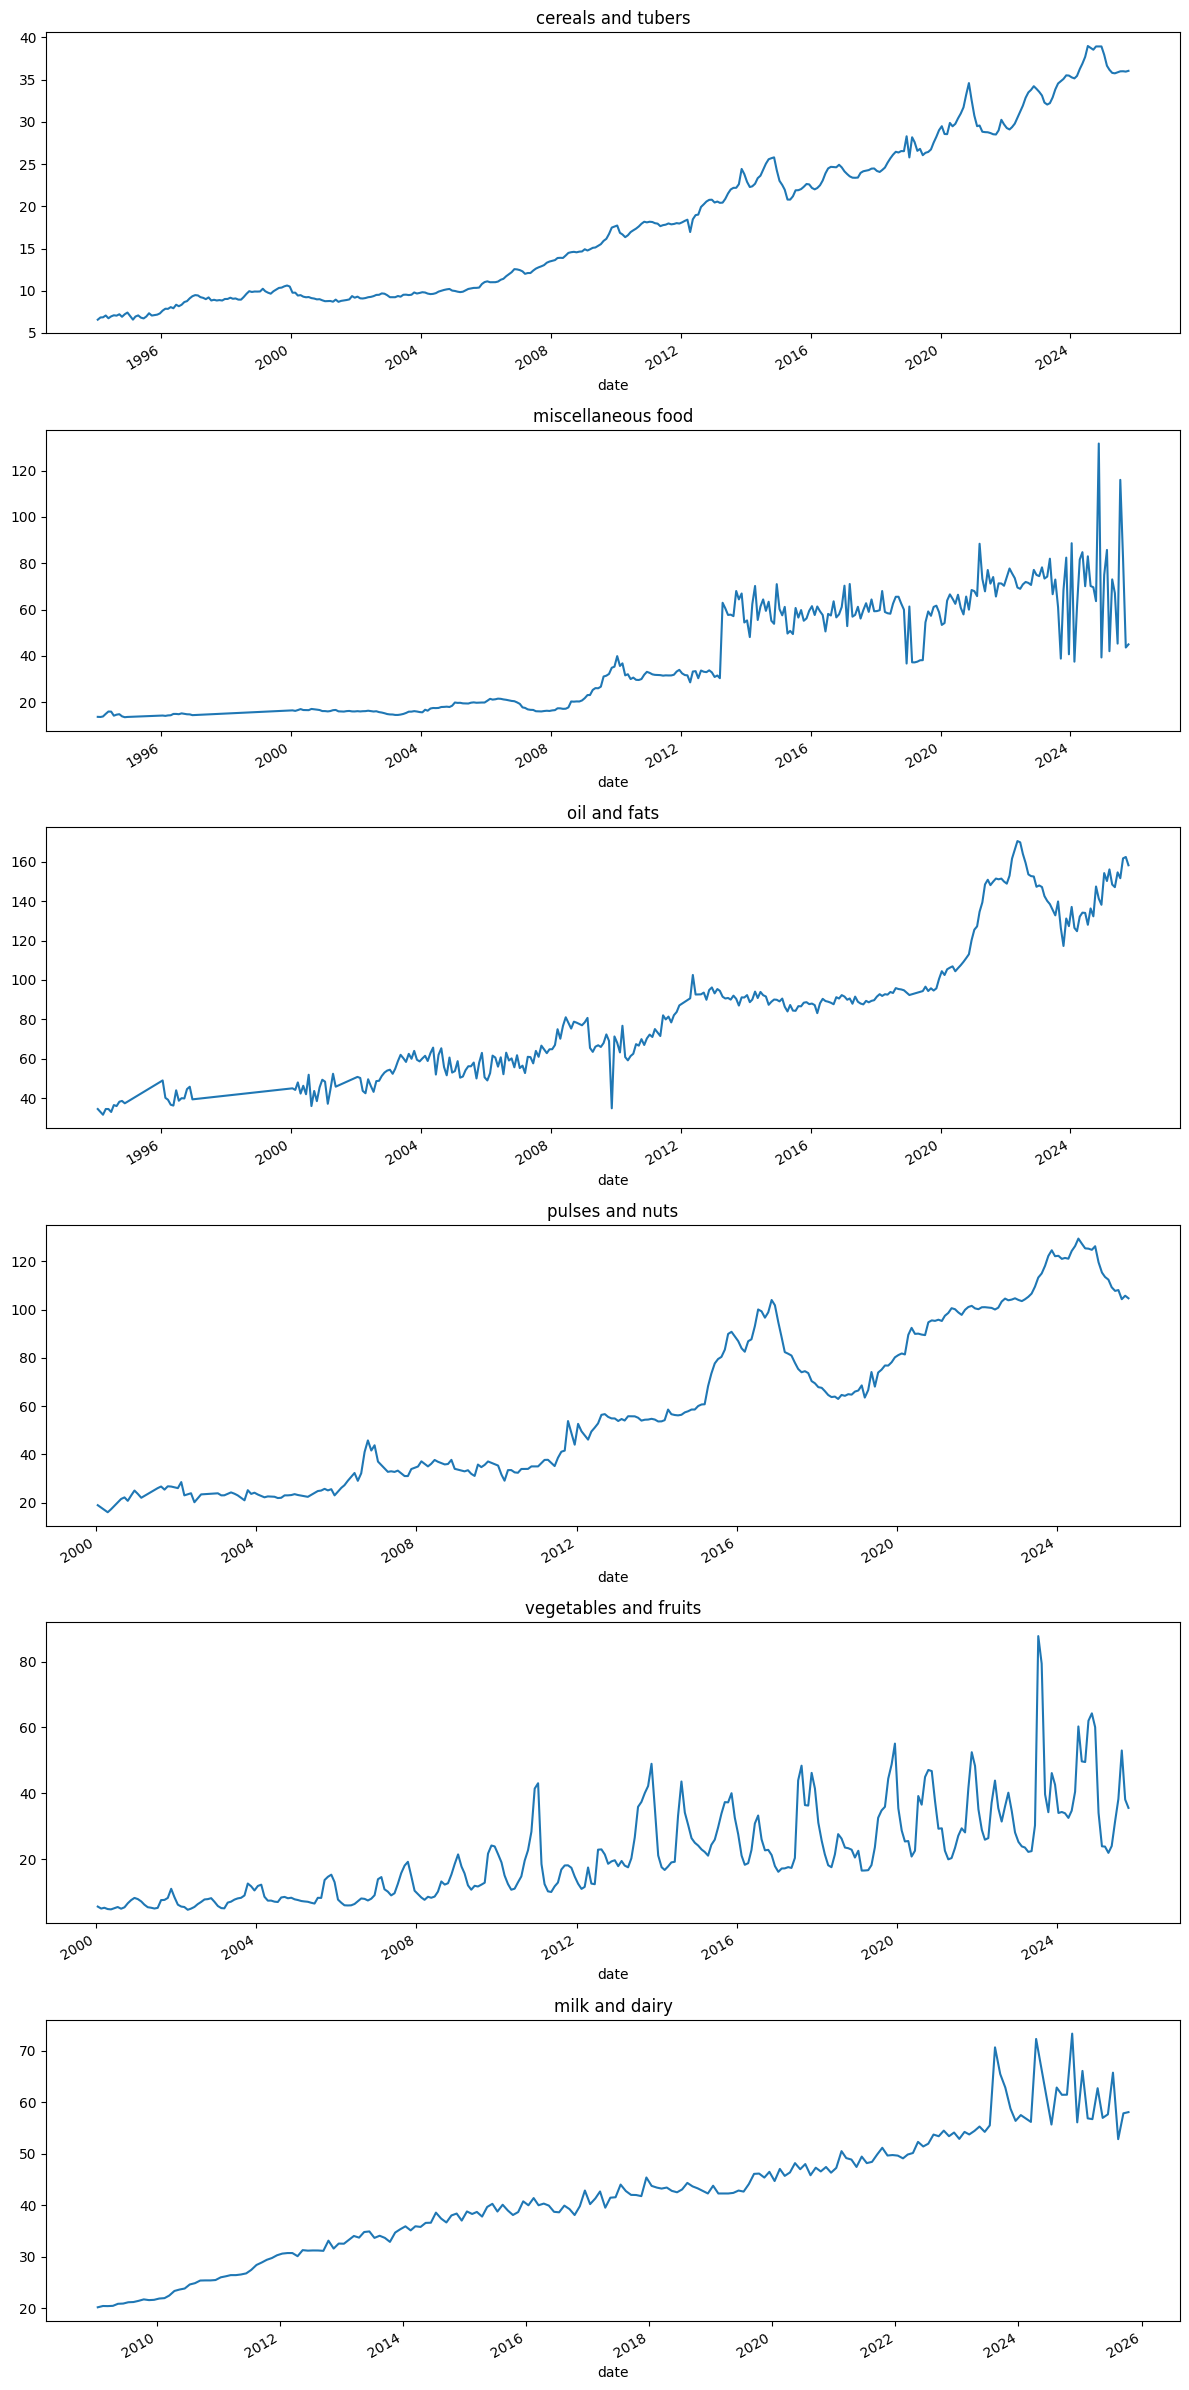

In [ ]:
import matplotlib.pyplot as plt

cats = df2['category'].unique()
n = len(cats)

fig, axes = plt.subplots(n, 1, figsize=(12, 4*n), sharex=False)

for ax, cat in zip(axes, cats):
    df2[df2['category'] == cat] \
        .groupby('date')['price'] \
        .mean() \
        .plot(ax=ax, title=cat)

plt.tight_layout()
plt.show()
